In [217]:
import os
from datasets import load_dataset, Audio
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd
import seaborn as sns

Basic analysis of data

In [218]:
os.getcwd()
print(os.listdir())

['.git', '.gitignore', '.venv', '1_data_modification.ipynb', '2_file_generation_script.ipynb', '3_merge_two_files.ipynb', 'data_files', 'raw_files', 'requirements.txt']


In [219]:
path = r"C:\Users\achal\Downloads\cv-corpus-21.0-delta-2025-03-14-en\cv-corpus-21.0-delta-2025-03-14\en\clips" # path to the audio files
audio_file = os.path.join(path, 'common_voice_en_42693841.mp3') # example audio file

ipd.Audio(audio_file)

In [220]:
validated = pd.read_csv("./raw_files/validated.tsv", sep="\t") # load the validated dataset
validated.head(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,116398939d6be70fc5fb532924a130c0adf286ac283499...,common_voice_en_41923025.mp3,f5a2a431746c5229ab696ba0e1a518fe7b26e208ff3b84...,"He was born at Wichenford, in Worcestershire, ...",NaN,2,0,thirties,NaN,United States English,NaN,en,NaN
1,24a4da2e8f053a45a0715849c222a40a4b0da9872efb2e...,common_voice_en_42356358.mp3,f6f009587d8812c147af1cc05079e1fcd8120c8a98cdf8...,The Portuguese division was overrun and withdr...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN
2,30849595699bc853c3810a78448acede46888b4e2d0809...,common_voice_en_42165090.mp3,f69afa5e77812e8be0085c874d2a9767323c78ffb43ba6...,Her health by this stage was also poor.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,42d53f34c1bc50f7a7c4ed1765a8d1ffeaf5cd441513cc...,common_voice_en_41921729.mp3,f5739acbefdbd3aac990792966fac4d40dcb39eb8dfa21...,His sporting interests outside of cricket incl...,NaN,2,0,nineties,NaN,England English,NaN,en,NaN
4,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528393.mp3,f7d35c60d76f025c45a9495757d1ee0e2b7c206317a288...,The following year he was elected to be part o...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN


In [221]:
validated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        249 non-null    object 
 1   path             249 non-null    object 
 2   sentence_id      249 non-null    object 
 3   sentence         249 non-null    object 
 4   sentence_domain  2 non-null      object 
 5   up_votes         249 non-null    int64  
 6   down_votes       249 non-null    int64  
 7   age              237 non-null    object 
 8   gender           194 non-null    object 
 9   accents          244 non-null    object 
 10  variant          0 non-null      float64
 11  locale           249 non-null    object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 25.4+ KB


In [222]:
invalidated = pd.read_csv("./raw_files/invalidated.tsv", sep="\t") # load the invalidated dataset
invalidated.tail(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
34,95ad670587afb013217297ae3da765f6ec63f8b4a76b96...,common_voice_en_42435500.mp3,f729aca87314500759ebeb35c641889e4bf57bffd470de...,The scene changes to a public rite of human sa...,NaN,0,2,twenties,NaN,Russian,NaN,en,NaN
35,057a083b43c6bffb19594cf7dd2b9ab2fe43730db03b67...,common_voice_en_42479052.mp3,f7770ed7af3b287a738643934ff58cbb6bcd8a2a2e8f1e...,The present head is Geraint Parry.,NaN,0,2,teens,female_feminine,United States English,NaN,en,NaN
36,aa23efe844309568394302a91812d79b6eaf6fa916227a...,common_voice_en_42488060.mp3,f78ebdd0e45a4863afc2c992273689e100ecbda4db6dd8...,"They'll never get in, he assured her.",NaN,0,2,NaN,NaN,United States English,NaN,en,NaN
37,47be82a9f386648b7d89b0eb6eb5b9f6925ce736373db0...,common_voice_en_42494898.mp3,f799ec89cb0ff182b2abe5c1850eea03d2d3cee585d104...,This award is France's highest civilian honor.,NaN,0,2,NaN,NaN,United States English,NaN,en,NaN
38,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528451.mp3,f7df57cff5730430b9d8927a1aa75aff4833566ad10fce...,It is a right tributary of the Po River.,NaN,0,2,teens,NaN,United States English,NaN,en,NaN


In [223]:
# Just looking at one of the audio files from invalidated dataset to know why it was invalidated
path = r"C:\Users\achal\Downloads\cv-corpus-21.0-delta-2025-03-14-en\cv-corpus-21.0-delta-2025-03-14\en\clips" # path to the audio files
audio_file = os.path.join(path, 'common_voice_en_42435500.mp3') # example audio file

ipd.Audio(audio_file)

In [224]:
invalidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        39 non-null     object 
 1   path             39 non-null     object 
 2   sentence_id      39 non-null     object 
 3   sentence         39 non-null     object 
 4   sentence_domain  0 non-null      float64
 5   up_votes         39 non-null     int64  
 6   down_votes       39 non-null     int64  
 7   age              36 non-null     object 
 8   gender           30 non-null     object 
 9   accents          38 non-null     object 
 10  variant          0 non-null      float64
 11  locale           39 non-null     object 
 12  segment          0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 4.1+ KB


In [225]:
others = pd.read_csv("./raw_files/other.tsv", sep="\t")
others.head(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c6...,common_voice_en_41910499.mp3,f58601a7c9362854e658254278cd0b17598f5da3f90280...,His mother is a casting director.,NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
1,c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c6...,common_voice_en_41910500.mp3,f58cf6dd38e1b0b55e9fd138250fc11dc3c55004349280...,Often Coast Guardsmen would judge landings by ...,NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
2,c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c6...,common_voice_en_41910501.mp3,f59ca399c8288f1c6942fe0611966e60e9703bd874d754...,"Each of us would have, in two ways, affirmed h...",NaN,0,0,NaN,NaN,United States English,NaN,en,NaN
3,c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c6...,common_voice_en_41910502.mp3,f59469e86e09d45bc2e4af7de8e374d38ee2f2f210cc9c...,In his address Colonel Gair referred to the la...,NaN,1,0,NaN,NaN,United States English,NaN,en,NaN
4,c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c6...,common_voice_en_41910503.mp3,f59af53edfdfe8c108e3e7357756bb09d91e0631b2cf31...,"It was named for its founder, Moses Kenney.",NaN,0,0,NaN,NaN,United States English,NaN,en,NaN


In [226]:
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21499 entries, 0 to 21498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        21499 non-null  object 
 1   path             21499 non-null  object 
 2   sentence_id      21499 non-null  object 
 3   sentence         21499 non-null  object 
 4   sentence_domain  148 non-null    object 
 5   up_votes         21499 non-null  int64  
 6   down_votes       21499 non-null  int64  
 7   age              15302 non-null  object 
 8   gender           11514 non-null  object 
 9   accents          13766 non-null  object 
 10  variant          0 non-null      float64
 11  locale           21499 non-null  object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.1+ MB


In [227]:
required_columns = ['accents', 'gender', 'age']

filtered_df_other = others.dropna(subset=required_columns).reset_index(drop=True)

print(filtered_df_other['client_id'].nunique())  #

56


In [228]:
filtered_df_other.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912051.mp3,f58e8d44585b8fb4e90b35b980dfe1d0119e740b1518dc...,She displaced on the surface and submerged.,NaN,0,0,fourties,female_feminine,Scottish English,NaN,en,NaN
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912052.mp3,f59c8fa0d83f17c3f2efc51c3db846ee0f5c389917ef06...,The fixed port is Sasebo base.,NaN,0,0,fourties,female_feminine,Scottish English,NaN,en,NaN
2,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912053.mp3,f571998bf123e742c0d1f2e03050848e0156ba250b7485...,The articles were registered with Companies Ho...,NaN,0,0,fourties,female_feminine,Scottish English,NaN,en,NaN
3,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912054.mp3,f59f8f20bde03d702e8a4ce732d5d2f712b5a63cec97f3...,"However, these changes demonstrate the dynamic...",NaN,0,0,fourties,female_feminine,Scottish English,NaN,en,NaN
4,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912055.mp3,f56a0b7b1ff5347f1455caed26e2832393c0cfcaac5929...,"These young can, within a day of hatching, lea...",NaN,0,0,fourties,female_feminine,Scottish English,NaN,en,NaN


In [229]:
audio_file = os.path.join(path, 'common_voice_en_42693814.mp3') 

ipd.Audio(audio_file)

In [230]:
filtered_df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10139 entries, 0 to 10138
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        10139 non-null  object 
 1   path             10139 non-null  object 
 2   sentence_id      10139 non-null  object 
 3   sentence         10139 non-null  object 
 4   sentence_domain  58 non-null     object 
 5   up_votes         10139 non-null  int64  
 6   down_votes       10139 non-null  int64  
 7   age              10139 non-null  object 
 8   gender           10139 non-null  object 
 9   accents          10139 non-null  object 
 10  variant          0 non-null      float64
 11  locale           10139 non-null  object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [231]:
print(filtered_df_other.up_votes.value_counts())
print(filtered_df_other.down_votes.value_counts())

up_votes
0    10039
1      100
Name: count, dtype: int64
down_votes
0    10057
1       82
Name: count, dtype: int64


Merging entries of others file with valid ones if upvotes on the audio > downvotes


In [232]:
filtered_other = filtered_df_other[filtered_df_other['up_votes'] > filtered_df_other['down_votes']].reset_index(drop=True)
filtered_other.head(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41915045.mp3,f59ffde8290a8713eb0a4ae3104318cc078980d0529980...,It is a two-lane highway its entire length.,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41918464.mp3,f5a8d9a4f1f0619b1fcc4a2f22d12fb603e6b29f2fbc47...,The hymn has been translated or adapted to Eng...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
2,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921766.mp3,f5c3f970cb6438d441b886d9d96d3f07b237852d31c54b...,General Roy Urquhart of Britain had his headqu...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
3,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921785.mp3,f5a4e9209a30876b734debf47a6a07756d1c26adcd7303...,Jerry Lee Lewis version,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
4,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41924862.mp3,f5a20b10118632d8a2fd2366c9c3ed250f168173285163...,Specimens from the Florida Keys are typically ...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN


In [233]:
filtered_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        95 non-null     object 
 1   path             95 non-null     object 
 2   sentence_id      95 non-null     object 
 3   sentence         95 non-null     object 
 4   sentence_domain  0 non-null      object 
 5   up_votes         95 non-null     int64  
 6   down_votes       95 non-null     int64  
 7   age              95 non-null     object 
 8   gender           95 non-null     object 
 9   accents          95 non-null     object 
 10  variant          0 non-null      float64
 11  locale           95 non-null     object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 9.8+ KB


In [234]:
filtered_other['unique_key'] = filtered_other['client_id'] + '_' + filtered_other['path']
filtered_df_other['unique_key'] = filtered_df_other['client_id'] + '_' + filtered_df_other['path']

In [235]:
filtered_df_other["unique_key"]

0        29b8505586cd43382cd695da6b943f401104be710a5b60...
1        29b8505586cd43382cd695da6b943f401104be710a5b60...
2        29b8505586cd43382cd695da6b943f401104be710a5b60...
3        29b8505586cd43382cd695da6b943f401104be710a5b60...
4        29b8505586cd43382cd695da6b943f401104be710a5b60...
                               ...                        
10134    10cdce246e990bae29f8547c038bc65278906935b312df...
10135    10cdce246e990bae29f8547c038bc65278906935b312df...
10136    10cdce246e990bae29f8547c038bc65278906935b312df...
10137    10cdce246e990bae29f8547c038bc65278906935b312df...
10138    10cdce246e990bae29f8547c038bc65278906935b312df...
Name: unique_key, Length: 10139, dtype: object

In [236]:
filtered_df_other_unique = filtered_df_other[~filtered_df_other['unique_key'].isin(filtered_other['unique_key'])].reset_index(drop=True)

In [237]:
filtered_other = filtered_other.drop(columns=['unique_key'])
filtered_df_other_unique = filtered_df_other_unique.drop(columns=['unique_key'])

In [238]:
len(filtered_df_other_unique)

10044

In [239]:
len(filtered_df_other) # difference = 95 == len(filtered_other) therefore duplicates are removed

10139

In [240]:
# Merge the two DataFrames 
new_validated = pd.concat([filtered_other, validated], ignore_index=True)

'''
Now the two dataframes to consider are new_validated and filtered_df_other_unique where we can fine tune our model on
this new_validated as it has only upvoted data and use filtered_df_other_unique for inference and testing.
'''

'\nNow the two dataframes to consider are new_validated and filtered_df_other_unique where we can fine tune our model on\nthis new_validated as it has only upvoted data and use filtered_df_other_unique for inference and testing.\n'

In [241]:
new_validated.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41915045.mp3,f59ffde8290a8713eb0a4ae3104318cc078980d0529980...,It is a two-lane highway its entire length.,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41918464.mp3,f5a8d9a4f1f0619b1fcc4a2f22d12fb603e6b29f2fbc47...,The hymn has been translated or adapted to Eng...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
2,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921766.mp3,f5c3f970cb6438d441b886d9d96d3f07b237852d31c54b...,General Roy Urquhart of Britain had his headqu...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
3,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921785.mp3,f5a4e9209a30876b734debf47a6a07756d1c26adcd7303...,Jerry Lee Lewis version,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN
4,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41924862.mp3,f5a20b10118632d8a2fd2366c9c3ed250f168173285163...,Specimens from the Florida Keys are typically ...,NaN,1,0,fourties,female_feminine,Scottish English,NaN,en,NaN


In [242]:
new_validated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        344 non-null    object 
 1   path             344 non-null    object 
 2   sentence_id      344 non-null    object 
 3   sentence         344 non-null    object 
 4   sentence_domain  2 non-null      object 
 5   up_votes         344 non-null    int64  
 6   down_votes       344 non-null    int64  
 7   age              332 non-null    object 
 8   gender           289 non-null    object 
 9   accents          339 non-null    object 
 10  variant          0 non-null      float64
 11  locale           344 non-null    object 
 12  segment          0 non-null      float64
dtypes: float64(2), int64(2), object(9)
memory usage: 35.1+ KB


Removing irrelevant features - Round 1

In [243]:
new_validated.sentence_domain.value_counts()

sentence_domain
technology_robotics    2
Name: count, dtype: int64

In [244]:
new_validated.client_id.nunique()

55

In [245]:
print(new_validated.locale.nunique())
print(filtered_df_other_unique['locale'].nunique())

1
1


In [246]:
cols_to_be_dropped = [ 'sentence_id', 'locale', 'segment', 'sentence_domain','variant']

final_validated = new_validated.drop(cols_to_be_dropped, axis=1)
final_others = filtered_df_other_unique.drop(cols_to_be_dropped, axis=1)

In [247]:
final_validated.reset_index(drop=True, inplace=True)
final_others.reset_index(drop=True, inplace=True)

In [248]:
final_validated.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents
0,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41915045.mp3,It is a two-lane highway its entire length.,1,0,fourties,female_feminine,Scottish English
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41918464.mp3,The hymn has been translated or adapted to Eng...,1,0,fourties,female_feminine,Scottish English
2,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921766.mp3,General Roy Urquhart of Britain had his headqu...,1,0,fourties,female_feminine,Scottish English
3,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41921785.mp3,Jerry Lee Lewis version,1,0,fourties,female_feminine,Scottish English
4,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41924862.mp3,Specimens from the Florida Keys are typically ...,1,0,fourties,female_feminine,Scottish English


In [249]:
final_others.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents
0,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912051.mp3,She displaced on the surface and submerged.,0,0,fourties,female_feminine,Scottish English
1,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912052.mp3,The fixed port is Sasebo base.,0,0,fourties,female_feminine,Scottish English
2,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912053.mp3,The articles were registered with Companies Ho...,0,0,fourties,female_feminine,Scottish English
3,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912054.mp3,"However, these changes demonstrate the dynamic...",0,0,fourties,female_feminine,Scottish English
4,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41912055.mp3,"These young can, within a day of hatching, lea...",0,0,fourties,female_feminine,Scottish English


In [250]:
print(len(final_validated))
print(len(final_others))

'''
We can see that the final_validated dataset has 344 rows and final_others has 10044 rows.
This is a huge difference in the number of rows. Therefore we have to reduce the final_others to a testable size or 
should increase the final_validated dataset to have enough training samples.
'''

344
10044


'\nWe can see that the final_validated dataset has 344 rows and final_others has 10044 rows.\nThis is a huge difference in the number of rows. Therefore we have to reduce the final_others to a testable size or \nshould increase the final_validated dataset to have enough training samples.\n'

In [251]:
final_others = final_others[final_others['down_votes'] == 0].reset_index(drop=True) # removing the downvoted samples from final_others

In [252]:
len(final_others)

9962

In [253]:
final_others['up_votes'].value_counts() #All the rows have zero up votes and down votes

up_votes
0    9962
Name: count, dtype: int64

Select few samples to add to training data i.e. to final_validated from final_others

In [254]:
final_others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   9962 non-null   object
 1   path        9962 non-null   object
 2   sentence    9962 non-null   object
 3   up_votes    9962 non-null   int64 
 4   down_votes  9962 non-null   int64 
 5   age         9962 non-null   object
 6   gender      9962 non-null   object
 7   accents     9962 non-null   object
dtypes: int64(2), object(6)
memory usage: 622.8+ KB


In [255]:
# Filter sentences between 3 and 15 words
filtered_others_good = final_others[
    final_others['sentence'].apply(lambda x: 3 <= len(str(x).split()) <= 15)
]
filtered_others_good.shape

'''
It is difficult to choose how many samples to take from the final_others dataset as even this filter is giving around 9000
samples. Let's see some trends and then decide.
'''

"\nIt is difficult to choose how many samples to take from the final_others dataset as even this filter is giving around 9000\nsamples. Let's see some trends and then decide.\n"

In [256]:
final_others['path'].nunique() #No duplicates

9962

In [257]:
final_others['client_id'].nunique()

56

In [258]:
final_validated['accents'].value_counts()

accents
nigerian accent                                                          95
United States English                                                    86
Scottish English                                                         52
Canadian English                                                         38
Filipino                                                                 27
Australian English                                                        6
England English                                                           6
British English / Received Pronunciation (RP)                             6
India and South Asia (India, Pakistan, Sri Lanka)                         5
United States English,Filipino                                            5
Lithuanian,Non-native                                                     5
L2                                                                        3
United States English,Southern United States English,Lightly Southern     2
Aust

In [259]:
accent_counts = final_validated['accents'].value_counts()

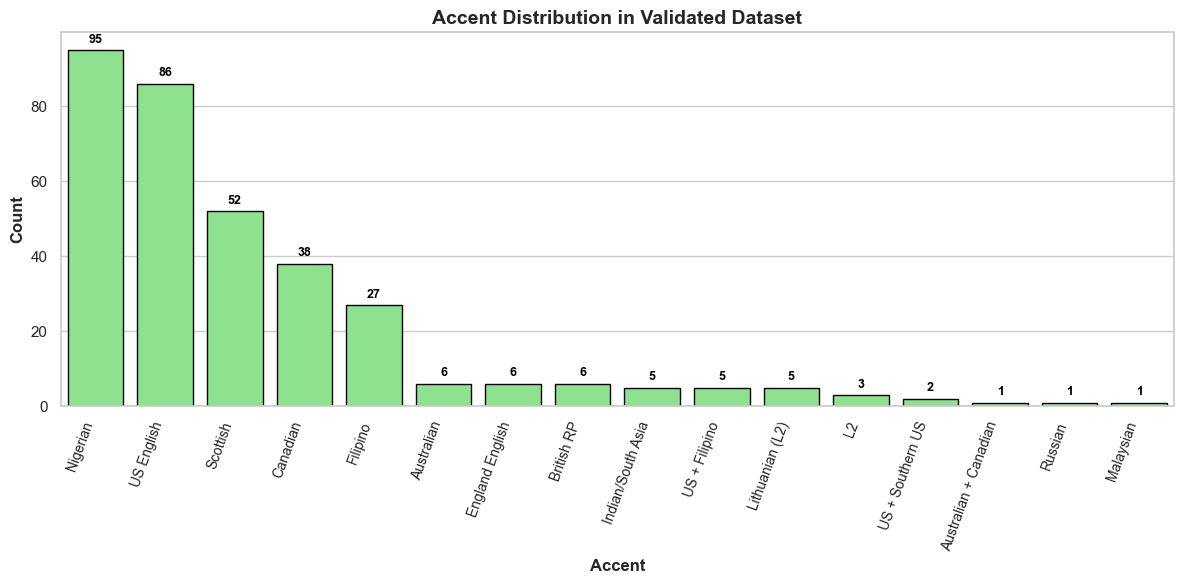

In [260]:
accent_indeces = [
    'Nigerian',
    'US English',
    'Scottish',
    'Canadian',
    'Filipino',
    'Australian',
    'England English',
    'British RP',
    'Indian/South Asia',
    'US + Filipino',
    'Lithuanian (L2)',
    'L2',
    'US + Southern US',
    'Australian + Canadian',
    'Russian',
    'Malaysian'
]


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.barplot(
    x=accent_indeces, 
    y=accent_counts.values, 
    color='#80ef80',
    # palette='pastel', 
    edgecolor='black'
)

plt.xlabel('Accent', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Accent Distribution in Validated Dataset', fontsize=14, fontweight='bold')

plt.xticks(rotation=70, ha='right', fontsize=10)

# Add counts on top of bars
for i, v in enumerate(accent_counts.values):
    plt.text(i, v + 2, str(v), color='black', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [261]:
final_others['accents'].value_counts()

accents
Scottish English                                     3205
United States English                                1910
Filipino                                             1669
nigerian accent                                      1411
Canadian English                                     1271
Australian English                                    166
India and South Asia (India, Pakistan, Sri Lanka)      96
Lithuanian,Non-native                                  91
United States English,Filipino                         34
England English                                        33
United States English,Midwestern,Low,Demure            20
British English / Received Pronunciation (RP)          19
United States English,Malaysian English                10
German English                                         10
L2                                                      7
United States English,North African                     5
United States English,England English                   5
Name: 

In [262]:
other_accent_counts = final_others['accents'].value_counts()

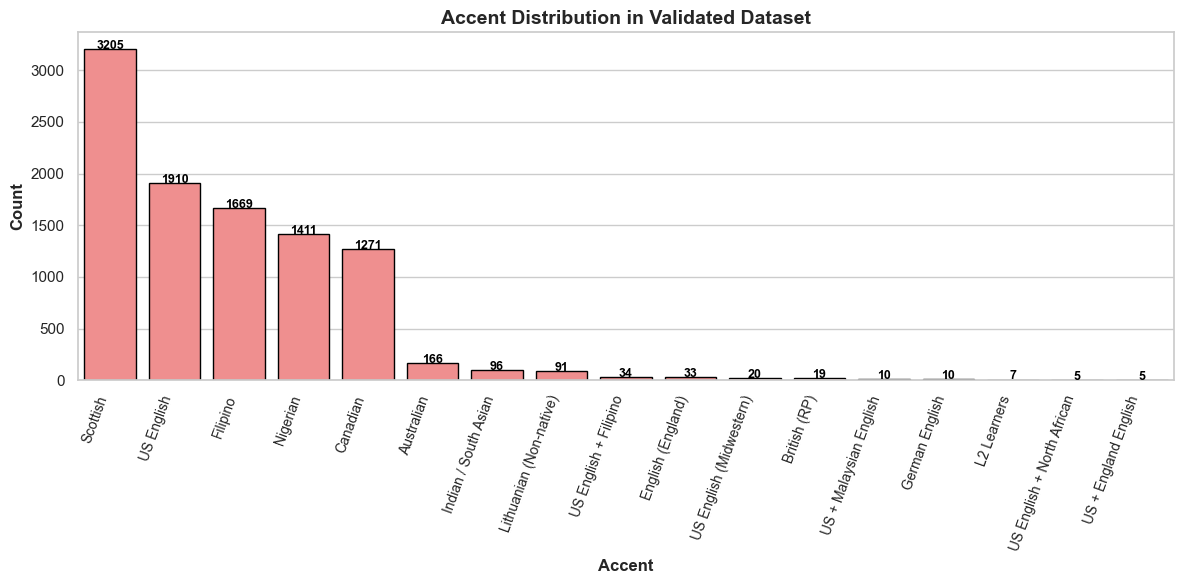

In [263]:
accent_list = [
    "Scottish",
    "US English",
    "Filipino",
    "Nigerian",
    "Canadian",
    "Australian",
    "Indian / South Asian",
    "Lithuanian (Non-native)",
    "US English + Filipino",
    "English (England)",
    "US English (Midwestern)",
    "British (RP)",
    "US + Malaysian English",
    "German English",
    "L2 Learners",
    "US English + North African",
    "US + England English"
]
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.barplot(
    x=accent_list, 
    y=other_accent_counts.values, 
    color ='#ff7f7f',
    # palette='pastel', 
    edgecolor='black'
)

plt.xlabel('Accent', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Accent Distribution in Validated Dataset', fontsize=14, fontweight='bold')

plt.xticks(rotation=70, ha='right', fontsize=10)

# Add counts on top of bars
for i, v in enumerate(other_accent_counts.values):
    plt.text(i, v + 2, str(v), color='black', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Instead of taking all the accents above, lets consider only few of them which have more samples to prevent noise

In [264]:
accent_mapping = {
    'nigerian accent': 'Nigerian',
    'United States English': 'US English',
    'Scottish English': 'Scottish',
    'Canadian English': 'Canadian',
    'Filipino': 'Filipino',
    'Australian English': 'Australian',
    'India and South Asia (India, Pakistan, Sri Lanka)': 'Indian/South Asia',
    'England English': 'British',
    'British English / Received Pronunciation (RP)': 'British',
    'Lithuanian,Non-native': 'Lithuanian',
}

def filter_and_group_accents(df, accent_column='accents'):
    df = df.copy()
    df[accent_column] = df[accent_column].map(accent_mapping)
    return df.dropna(subset=[accent_column]).reset_index(drop=True)

f_validated = filter_and_group_accents(final_validated)
f_other = filter_and_group_accents(final_others)


In [265]:
print("Validated dataset after filtering:", len(f_validated))
print("Other dataset after filtering:", len(f_other))

Validated dataset after filtering: 326
Other dataset after filtering: 9871


In [266]:
f_validated['accents'].value_counts()

accents
Nigerian             95
US English           86
Scottish             52
Canadian             38
Filipino             27
British              12
Australian            6
Indian/South Asia     5
Lithuanian            5
Name: count, dtype: int64

In [267]:
f_other['accents'].value_counts()

accents
Scottish             3205
US English           1910
Filipino             1669
Nigerian             1411
Canadian             1271
Australian            166
Indian/South Asia      96
Lithuanian             91
British                52
Name: count, dtype: int64

In [268]:
f_validated.iloc[20:30]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents
20,29b8505586cd43382cd695da6b943f401104be710a5b60...,common_voice_en_41986023.mp3,This temple has one prakaram.,1,0,fourties,female_feminine,Scottish
21,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986227.mp3,Find out how the Environmental Protection Agen...,1,0,sixties,male_masculine,Filipino
22,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986254.mp3,Its current mission is to enhance and share hu...,1,0,sixties,male_masculine,Filipino
23,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986272.mp3,James tore the patellar tendon in his right kn...,1,0,sixties,male_masculine,Filipino
24,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986284.mp3,The name is most commonly found in Saare County.,1,0,sixties,male_masculine,Filipino
25,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986290.mp3,"It has a mayor, Kirt Wynter, and a thriving ma...",1,0,sixties,male_masculine,Filipino
26,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986298.mp3,"Culturally, Moscow is a melting pot of differe...",1,0,sixties,male_masculine,Filipino
27,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986304.mp3,In terms of its climate Tenerife is particular...,1,0,sixties,male_masculine,Filipino
28,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986342.mp3,Sketch for Sport Relief.,1,0,sixties,male_masculine,Filipino
29,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_en_41986359.mp3,As an adult she worked as an accountant and a ...,1,0,sixties,male_masculine,Filipino


In [269]:
print(f_validated.shape[0])
print(f_other.shape[0]) 

326
9871


Now selecting and adding few samples from f_other to f_validated such that training set has more examples 

In [270]:
# Dont forget to add two more languages if possible to both the sets and also prepare test set from f_others which is not in f_validated

In [271]:
chosen_accent = 'Indian/South Asia' # choose the accent to filter
filter = f_other[f_other['accents'] == chosen_accent].reset_index(drop=True)
filter

,client_id,path,sentence,up_votes,down_votes,age,gender,accents
0,78899c686b3bdef6619b63f98b03d3f5fdf2ca7427d0ce...,common_voice_en_41918311.mp3,The Second Republic was superseded by the Thir...,0,0,twenties,male_masculine,Indian/South Asia
1,78899c686b3bdef6619b63f98b03d3f5fdf2ca7427d0ce...,common_voice_en_41918313.mp3,His home was later turned into a museum.,0,0,twenties,male_masculine,Indian/South Asia
2,78899c686b3bdef6619b63f98b03d3f5fdf2ca7427d0ce...,common_voice_en_41918314.mp3,"A schoolteacher by profession, he later taught...",0,0,twenties,male_masculine,Indian/South Asia
3,78899c686b3bdef6619b63f98b03d3f5fdf2ca7427d0ce...,common_voice_en_41918315.mp3,The torches were bundles of straw wrapped arou...,0,0,twenties,male_masculine,Indian/South Asia
4,78899c686b3bdef6619b63f98b03d3f5fdf2ca7427d0ce...,common_voice_en_41918322.mp3,Tourism is the mainstay of the island's economy.,0,0,twenties,male_masculine,Indian/South Asia
...,...,...,...,...,...,...,...,...
91,58638f80377d44546b1334d080799ef1cd0c94576d3bc2...,common_voice_en_42658008.mp3,Lake Bardwell is to the east.,0,0,thirties,female_feminine,Indian/South Asia
92,58638f80377d44546b1334d080799ef1cd0c94576d3bc2...,common_voice_en_42658009.mp3,"They had three daughters: Ida, Tamar and Nino.",0,0,thirties,female_feminine,Indian/South Asia
93,58638f80377d44546b1334d080799ef1cd0c94576d3bc2...,common_voice_en_42658010.mp3,Both played for Warsaw Community High School.,0,0,thirties,female_feminine,Indian/South Asia
94,58638f80377d44546b1334d080799ef1cd0c94576d3bc2...,common_voice_en_42658011.mp3,Arena first coached Williams at the University...,0,0,thirties,female_feminine,Indian/South Asia


In [272]:
path = r"C:\Users\achal\Downloads\cv-corpus-21.0-delta-2025-03-14-en\cv-corpus-21.0-delta-2025-03-14\en\clips" # path to the audio files
audio_file = os.path.join(path, 'common_voice_en_41918311.mp3') # example audio file

ipd.Audio(audio_file)

In [273]:
all_accents = f_other['accents'].dropna().unique()

# List to collect rows that we'll append
new_rows_list = []

for accent in all_accents:
    # Filter f_other rows for this accent
    f_other_accent = f_other[f_other['accents'] == accent]
    
    # Get unique client_ids
    clients = f_other_accent['client_id'].unique()
    selected_rows = []

    # First pass: pick one row per client until we reach 45 or run out
    for client in clients:
        client_rows = f_other_accent[f_other_accent['client_id'] == client]
        if not client_rows.empty:
            selected_rows.append(client_rows.sample(1, random_state=42))
            if len(selected_rows) >= 45:
                break

    # If still need more rows (not enough unique clients), pick extra random rows
    if len(selected_rows) < 45:
        already_selected_df = pd.concat(selected_rows) if selected_rows else pd.DataFrame()
        extras = f_other_accent[~f_other_accent['path'].isin(already_selected_df['path'])].sample(
            45 - len(selected_rows), replace=False, random_state=42
        )
        selected_rows.append(extras)

    # Combine selected rows
    selected_rows_df = pd.concat(selected_rows, ignore_index=True)
    new_rows_list.append(selected_rows_df)

# Combine all selected rows from all accents
final_selected_df = pd.concat(new_rows_list, ignore_index=True)

# Append these new rows to f_validated
f_validated_updated = pd.concat([f_validated, final_selected_df], ignore_index=True)

# Remove these exact rows from f_other using 'path' column (which is unique)
f_other_updated = f_other[~f_other['path'].isin(final_selected_df['path'])]

In [274]:
f_validated_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   731 non-null    object
 1   path        731 non-null    object
 2   sentence    731 non-null    object
 3   up_votes    731 non-null    int64 
 4   down_votes  731 non-null    int64 
 5   age         723 non-null    object
 6   gender      686 non-null    object
 7   accents     731 non-null    object
dtypes: int64(2), object(6)
memory usage: 45.8+ KB


In [275]:
f_validated_updated['accents'].value_counts()

accents
Nigerian             140
US English           131
Scottish              97
Canadian              83
Filipino              72
British               57
Australian            51
Indian/South Asia     50
Lithuanian            50
Name: count, dtype: int64

In [276]:
f_validated['accents'].value_counts()

accents
Nigerian             95
US English           86
Scottish             52
Canadian             38
Filipino             27
British              12
Australian            6
Indian/South Asia     5
Lithuanian            5
Name: count, dtype: int64

In [277]:
f_other_updated['accents'].value_counts()

accents
Scottish             3160
US English           1865
Filipino             1624
Nigerian             1366
Canadian             1226
Australian            121
Indian/South Asia      51
Lithuanian             46
British                 7
Name: count, dtype: int64

In [278]:
f_other['accents'].value_counts()

accents
Scottish             3205
US English           1910
Filipino             1669
Nigerian             1411
Canadian             1271
Australian            166
Indian/South Asia      96
Lithuanian             91
British                52
Name: count, dtype: int64

In [279]:
required_columns = ['path', 'sentence', 'client_id', 'accents', 'age', 'gender']

f_other_clean = f_other_updated[f_other_updated[required_columns].notnull().all(axis=1)]

accent_row_dict = {
    'Scottish': 27,
    'US English': 21,
    'Filipino': 18,
    'Nigerian': 15,
    'Canadian': 13,
    'Australian': 10,
    'Indian/South Asia': 9,
    'Lithuanian': 8,
    'British': 6
}


selected_rows_list = []

for accent, num_rows in accent_row_dict.items():
    f_accent_clean = f_other_clean[f_other_clean['accents'] == accent]
    available_count = len(f_accent_clean)

    print(f"\nAccent '{accent}' — Clean rows available: {available_count}")

    # Check availability
    if available_count >= num_rows:
        selected_rows = f_accent_clean.sample(num_rows, random_state=42)
    else:
        print(f"Only {available_count} clean rows available for accent '{accent}'. Taking all available.")
        selected_rows = f_accent_clean

    selected_rows_list.append(selected_rows)

#  Combine selected rows
final_test_set = pd.concat(selected_rows_list, ignore_index=True)

#  Remove selected rows from f_other_updated
f_other_updated_new = f_other_updated[~f_other_updated['path'].isin(final_test_set['path'])]




Accent 'Scottish' — Clean rows available: 3160

Accent 'US English' — Clean rows available: 1865

Accent 'Filipino' — Clean rows available: 1624

Accent 'Nigerian' — Clean rows available: 1366

Accent 'Canadian' — Clean rows available: 1226

Accent 'Australian' — Clean rows available: 121

Accent 'Indian/South Asia' — Clean rows available: 51

Accent 'Lithuanian' — Clean rows available: 46

Accent 'British' — Clean rows available: 7


In [280]:
final_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   127 non-null    object
 1   path        127 non-null    object
 2   sentence    127 non-null    object
 3   up_votes    127 non-null    int64 
 4   down_votes  127 non-null    int64 
 5   age         127 non-null    object
 6   gender      127 non-null    object
 7   accents     127 non-null    object
dtypes: int64(2), object(6)
memory usage: 8.1+ KB


In [281]:
f_validated_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   731 non-null    object
 1   path        731 non-null    object
 2   sentence    731 non-null    object
 3   up_votes    731 non-null    int64 
 4   down_votes  731 non-null    int64 
 5   age         723 non-null    object
 6   gender      686 non-null    object
 7   accents     731 non-null    object
dtypes: int64(2), object(6)
memory usage: 45.8+ KB


In [ ]:
# f_validated_updated.to_csv("train_base.csv", index=False)
# final_test_set.to_csv("test_base.csv", index=False)